In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![Google Review](https://www.manyoujingyu.com/wp-content/uploads/2020/04/GOOGLE-REVIEW-banner.jpg)

# Introduction

I'm kind of people who love traveling. But sometimes I've problems like where should I visit? Are there somewhere interesting places matched with my lifestyle? Often I spent hours to search for interesting place to go out. Such a waste of time. 

What if we can build a recommender system which can recommend you several interesting venue based on your preferences. With information from Google review, I'll try to divide Google review user into cluster of similar interest for further work of building recommender system based on thier preference.

Google review is a platform where customers give a rating (from 0-5 stars) and leave a comment to a specific places in google maps

In [3]:
cat = """user
churches
resorts
beaches
parks
theatres
museums
malls
zoo
restaurants
pubs/bars
local services
burger/pizza shops
hotels/other lodgings
juice bars
art galleries
dance clubs
swimming pools
gyms
bakeries
beauty & spas
cafes
view points
monuments
gardens"""
columns_list = cat.split("\n")
# for i in range(len(columns_list)):
#   columns_list[i] = columns_list[i].strip()

## Dataset Explanation

This data set has been sourced from the Machine Learning Repository of University of California, Irvine (UC Irvine) : Travel Review Ratings Data Set. This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

* Attribute 1 : Unique user id 
* Attribute 2 : Average ratings on churches
* Attribute 3 : Average ratings on resorts
* Attribute 4 : Average ratings on beaches
* Attribute 5 : Average ratings on parks
* Attribute 6 : Average ratings on theatres
* Attribute 7 : Average ratings on museums
* Attribute 8 : Average ratings on malls
* Attribute 9 : Average ratings on zoo
* Attribute 10 : Average ratings on restaurants
* Attribute 11 : Average ratings on pubs/bars
* Attribute 12 : Average ratings on local services
* Attribute 13 : Average ratings on burger/pizza shops
* Attribute 14 : Average ratings on hotels/other lodgings
* Attribute 15 : Average ratings on juice bars
* Attribute 16 : Average ratings on art galleries
* Attribute 17 : Average ratings on dance clubs
* Attribute 18 : Average ratings on swimming pools
* Attribute 19 : Average ratings on gyms
* Attribute 20 : Average ratings on bakeries
* Attribute 21 : Average ratings on beauty & spas
* Attribute 22 : Average ratings on cafes
* Attribute 23 : Average ratings on view points
* Attribute 24 : Average ratings on monuments
* Attribute 25 : Average ratings on gardens


In [4]:
df = pd.read_csv('./google_review_ratings.csv',header=0,names = columns_list,index_col=False)
df = df.set_index('user')
df.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\3837314156.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('./google_review_ratings.csv',header=0,names = columns_list,index_col=False)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

In [5]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

None

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


All attribute should be float64 datatype, there is something wrong with "local services" attribute. Since they're in object type. It might be error while loading file, I'll simply cast datatype to float

In [6]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')

In [7]:
print('Total missing values in dataset')
display(df.isnull().sum())
df = df.dropna()

Total missing values in dataset


churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

There is only 1 missing values in gardens and burger/pizza shops review. So, I'll simply drop those instance out.

Now let's look how our data is distributed

In [8]:
sns.set(style='darkgrid',palette = 'Set3',font_scale=1.25)

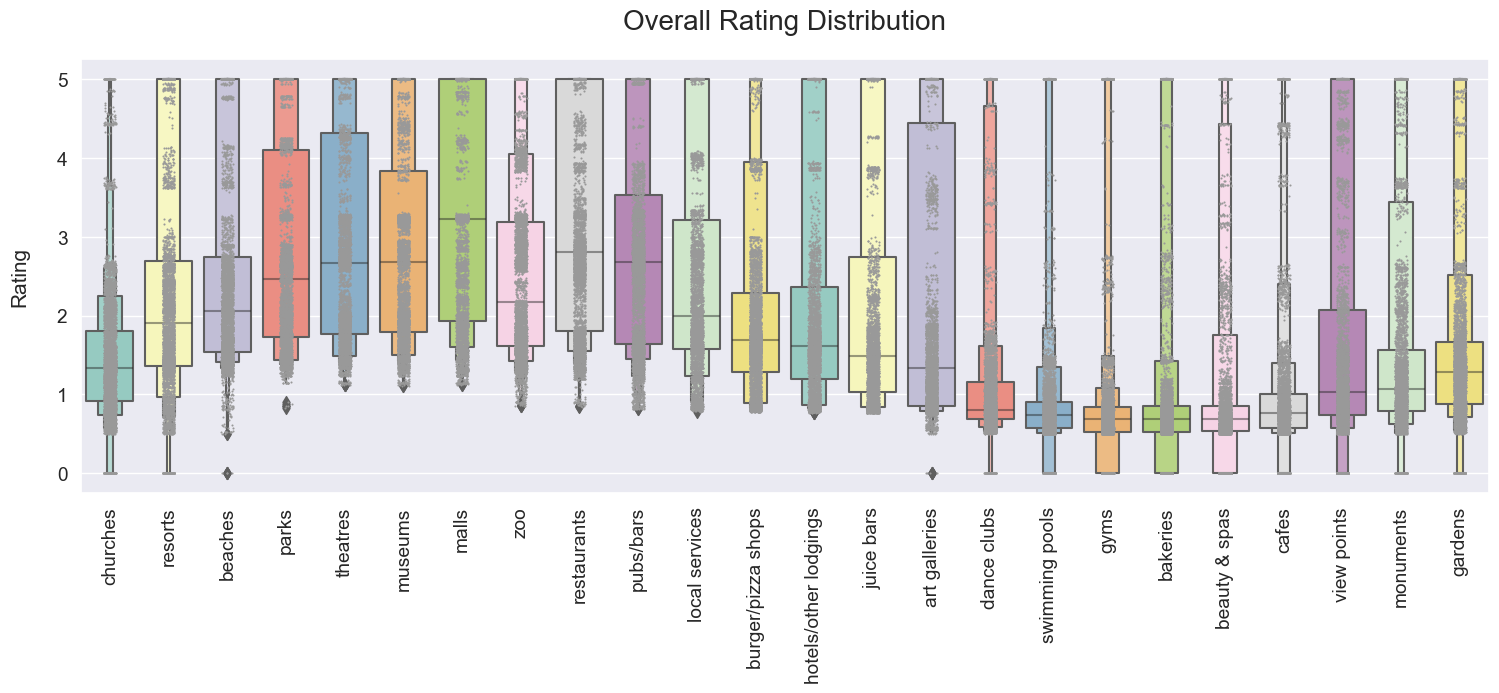

In [9]:
df_transform = pd.melt(df,value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens'])

fig = plt.figure(figsize = (15,7))
g = sns.boxenplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g = sns.stripplot(x='variable',y='value',data=df_transform,size=1.5, color=".6")
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)
plt.savefig('Overall Rating Distribution.png')

**Observation**

* Overall rating are lying between 0.5 to 5 stars
* Some attractions have wide-range of rating distribution (suchas pubs/bars, restaurants) since they are common attraction point where most of tourist must visit
* On the other hand, some attrations such as gyms, bakeries, swimming pools have relatively low rating. It might be interesting to find out why most of user gave low rating to this type of attractions
* Since we don't have enough information about attraction itself or descriptive user reivews, In this notebook we'll focus on segmenting user into different cluster based on their preferences

# K-Means Clustering : Find right number of cluster

In this section, I'll try K-Means clustering algorithm on 4 Scenarios and compared it result

1. K-Means Clustering on original data (24 features)
1. K-Means Clustering on scaled origninal data (24 features with scaled) by using StandardScaler
1. K-Means Clustering on PCA component
1. K-Means Clustering on PCA component with scaled data

Let's see how it's like in action

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker

#Original data
df_original = df

#Scaled Data
df_scaled = StandardScaler().fit_transform(df)

#PCA without scaling
pca = PCA(n_components=2, random_state=42)
df_PCA = pca.fit_transform(df_original)

#PCA with scaling
df_PCA_scaled = pca.fit_transform(df_scaled)

data_list = [df_original, df_scaled, df_PCA, df_PCA_scaled]
inertia_list = []
list_k = list(range(1, 30))

#Run elbow to evaluate number of clusters
for i in range(len(data_list)):
    sse = []
    data = data_list[i]
    for k in list_k:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(data)
        sse.append(km.inertia_)
    inertia_list.append(sse)

result_ori = pd.DataFrame({'K': list_k, 'Inertia': inertia_list[0], 'data_type': 'original'})
result_ori_scaled = pd.DataFrame({'K': list_k, 'Inertia': inertia_list[1], 'data_type': 'original_scaled'})
result_PCA = pd.DataFrame({'K': list_k, 'Inertia': inertia_list[2], 'data_type': 'PCA'})
result_PCA_scaled = pd.DataFrame({'K': list_k, 'Inertia': inertia_list[3], 'data_type': 'PCA_scaled'})

# Concatenating results
result = pd.concat([result_ori, result_ori_scaled, result_PCA, result_PCA_scaled], ignore_index=True)

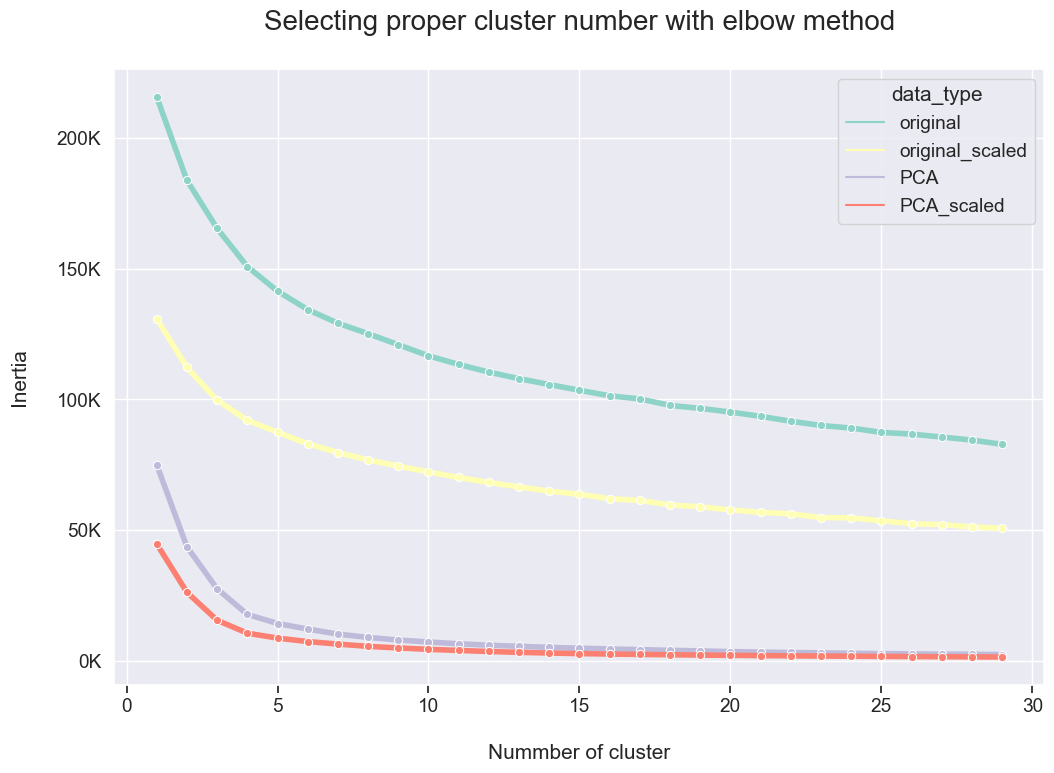

In [17]:
fig = plt.figure(figsize=(12,8))
g = sns.lineplot(data=result,x='K',y='Inertia',hue='data_type',linewidth=4,marker='o')
g.set_xlabel('Nummber of cluster', labelpad = 20)
g.set_ylabel('Inertia', labelpad = 20)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
g.tick_params(which="both", bottom=True)
g.set_title('Selecting proper cluster number with elbow method',y=1.05, fontsize=20);

In [18]:
pca.explained_variance_ratio_.sum()

0.3420590178212099

**Observation:** 

* It's clear that PCA version with scaled data has much more lower inertia than original one and unscaled version
* Moreover, It's really hard to select appropriate number of cluster when using original data (It's have no distinguish elbow shape compared to PCA version)

However, please also note that running K-Mean clustering algorithm on only 2 principle components which represent only 34% of original information (cummilative explianed variance ratio ~ 34%) may result in not so good clustering performance


**In conclusion, I'll continue on K-Mean clustering analysis on PCA_scaled data with number of cluster = 4**


# K-Means clustering : Result and Discussion

In [19]:
pca = PCA(n_components = 2,random_state=42)
df_PCA_scaled = pca.fit_transform(df_scaled)

model = KMeans(n_clusters=4,random_state=42)
model.fit(df_PCA_scaled)
cluster = model.labels_

c:\Users\abhis\anaconda3\envs\gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
df_PCA_scaled

array([[-1.89270769, -1.60367877],
       [-1.96495805, -1.63694405],
       [-1.96442399, -1.63133412],
       ...,
       [ 3.92826319, -0.830705  ],
       [ 3.67942174, -0.12194168],
       [ 3.90272316, -1.01572374]])

In [37]:
df_scaled[0]

array([-1.75887873, -1.63217486,  0.91466317,  0.65153008,  1.52472827,
        0.02073102,  1.16654999, -0.17203078, -0.58713897, -0.14741301,
       -0.61505727, -0.31091991, -0.30273981, -0.29842742, -0.27169257,
       -0.54441681, -0.46156285, -0.86770801, -0.39014026, -0.83789541,
       -1.03989762, -1.09493605, -1.16335998, -1.33191196])

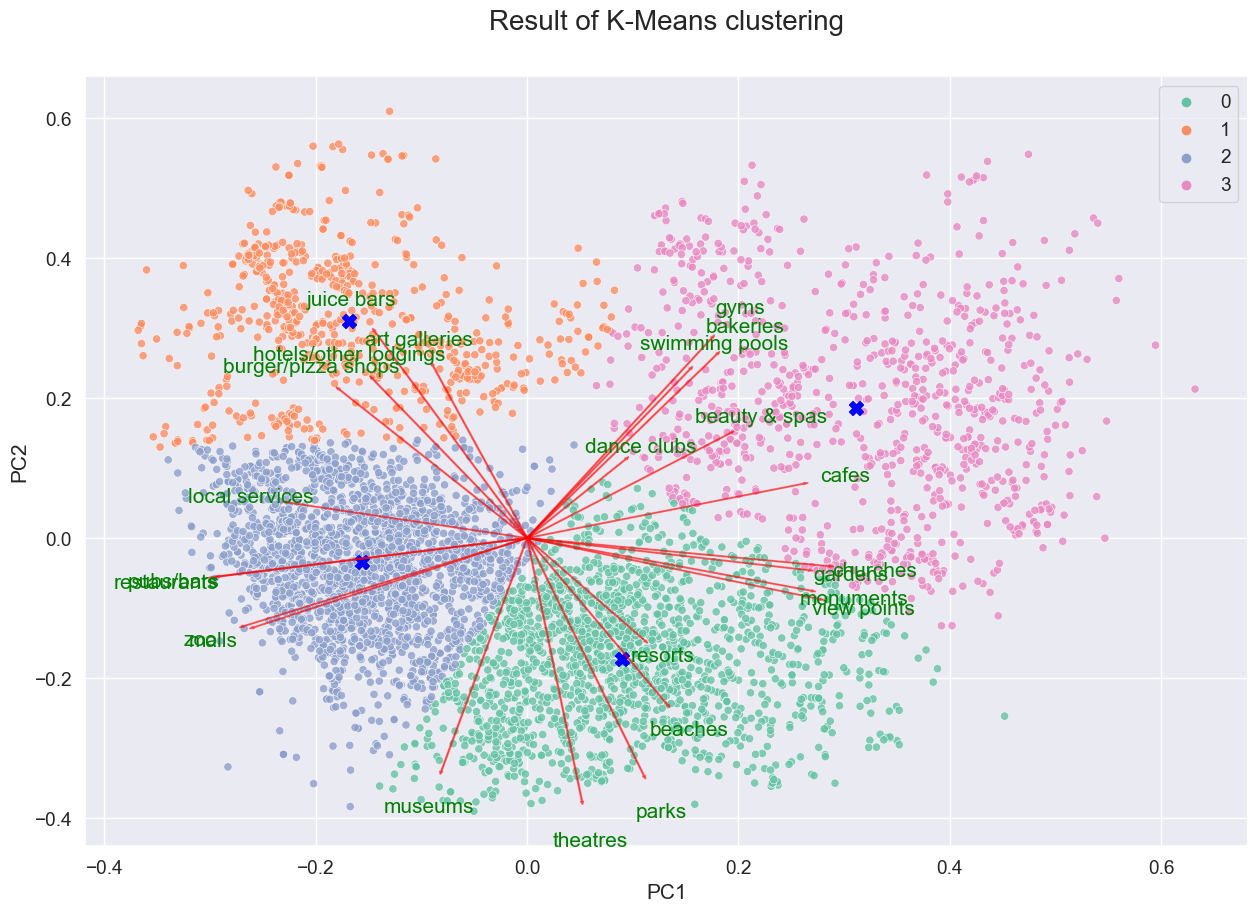

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df.columns)

xs = df_PCA_scaled[:,0]
ys = df_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

# scatter plot of each data point
g = sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=cluster, palette='Set2', alpha=0.8)

# add cluster centroid
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b', s=100, marker='X')

# add EigenVector representing how each attraction categories related to PC1 and PC2
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
    plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('Result of K-Means clustering', y=1.05, fontsize=20)
plt.savefig('Clustering Result.png')
plt.show()


K-Means clustering result in 4 clusters(segments) of user as follow,
1. Cluster#0 (Green)  : User who prefer nature like beaches and park, And also love to go to museums and theatres
1. Cluster#1 (Orange) : Fast food lover, pay attention to hotel and juice bar and also have art in thier heart
1. Cluster#2 (Light Blue) : Activities finder, this type of user love to go to local service, spend thier time in zoo, shopping in mall, having dinner in fine restaurant and pubs/bars
1. Cluster#3 (Pink) : From scatter plot, member of this cluster are not loosely spread, they might or might not share common interest 

C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\1865992880.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\1865992880.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\1865992880.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\1865992880.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same 

<function matplotlib.pyplot.savefig(*args, **kwargs)>

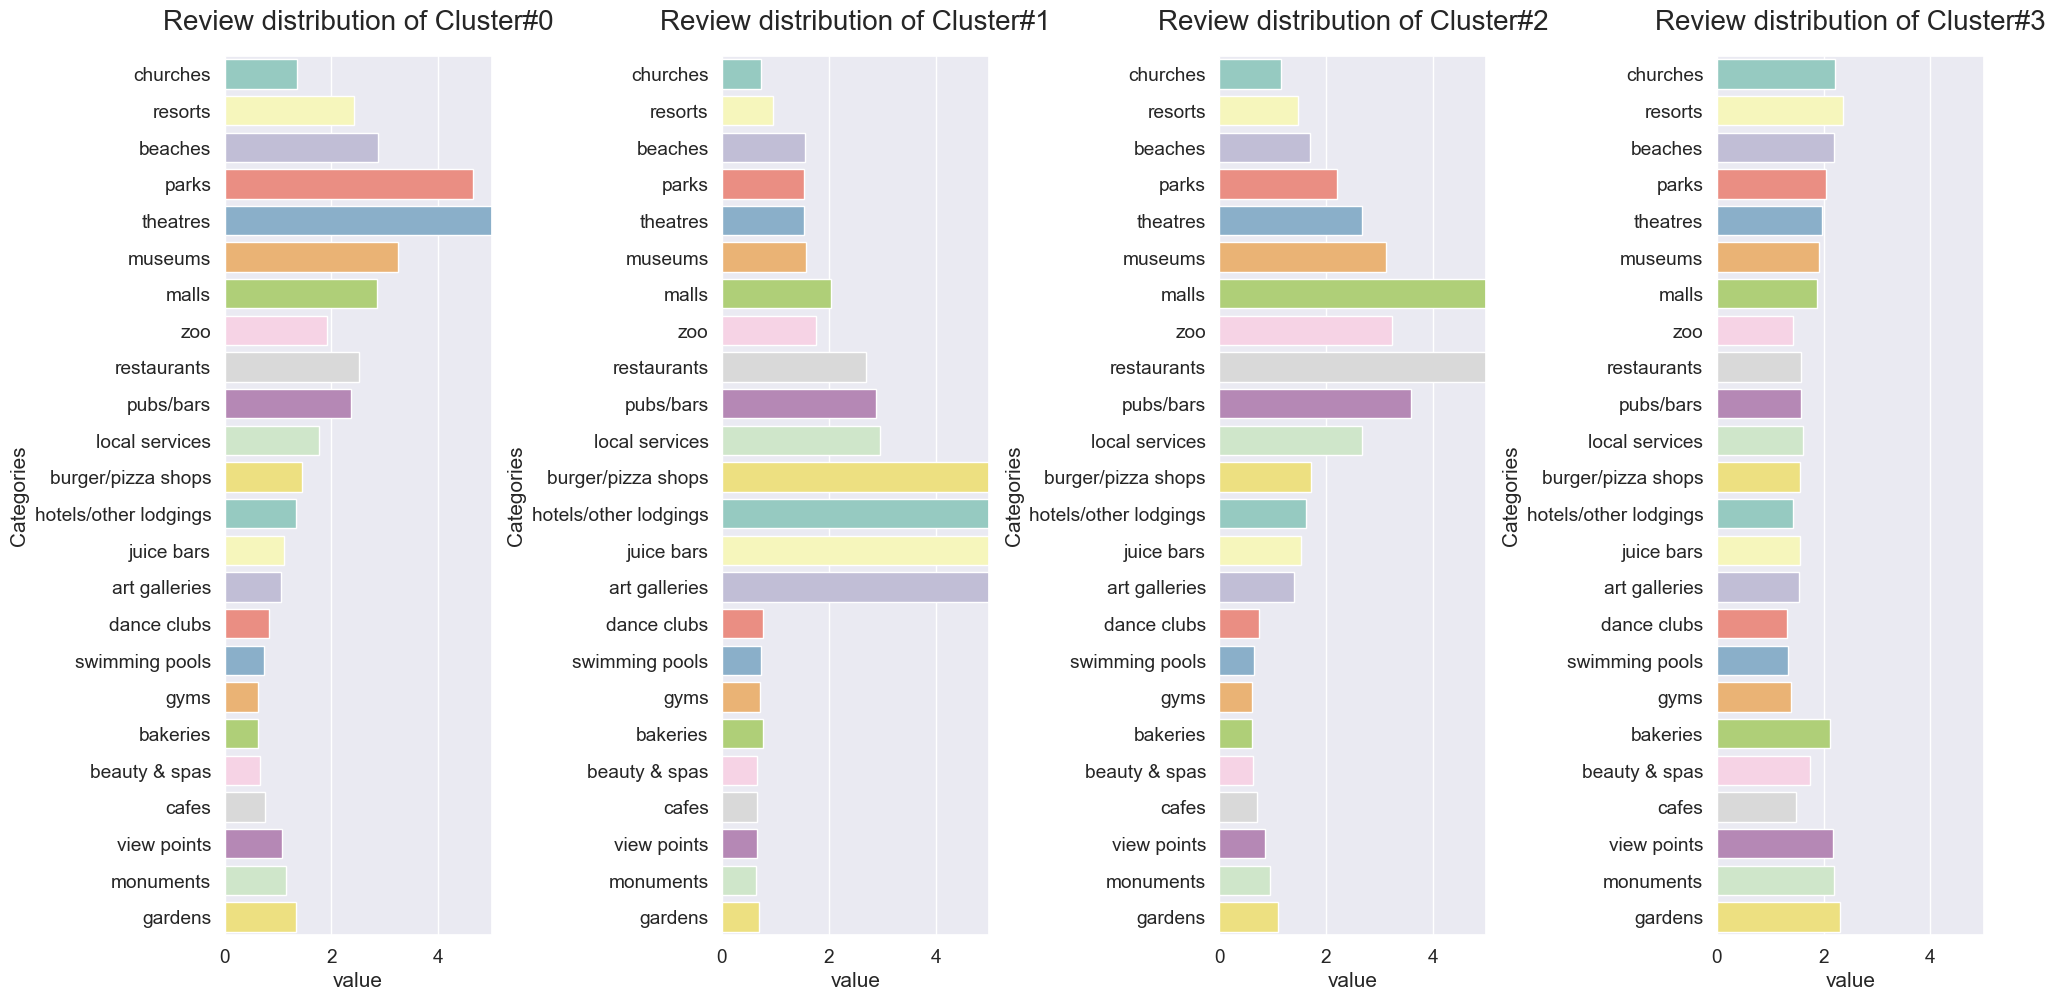

In [22]:
df['cluster'] = model.labels_
df_long = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

C:\Users\abhis\AppData\Local\Temp\ipykernel_15648\747162654.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(y='categories',x='value',data=df_long,kind='bar',
c:\Users\abhis\anaconda3\envs\gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

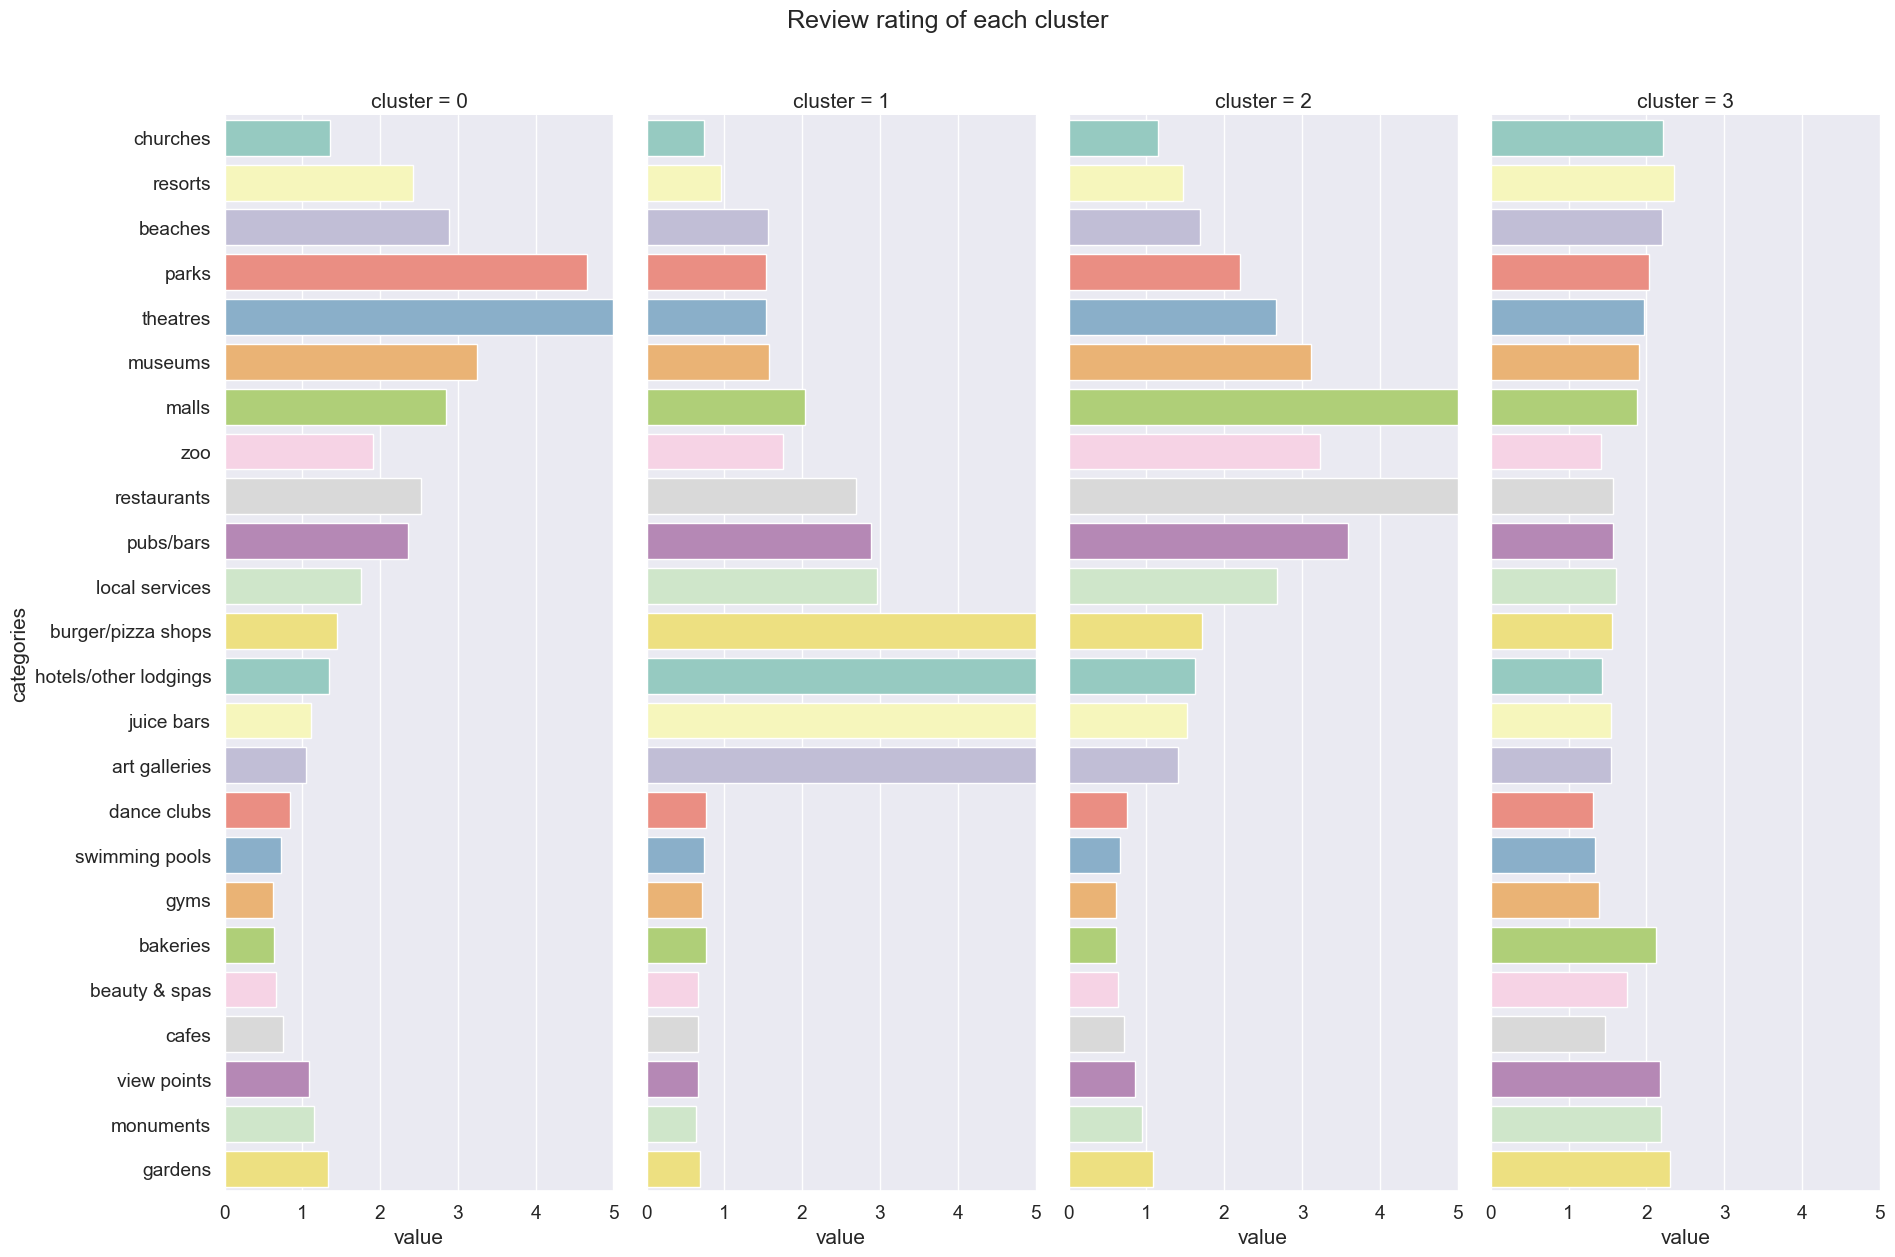

In [23]:
fig = plt.figure(figsize = (20,10))
g = sns.catplot(y='categories',x='value',data=df_long,kind='bar',
                palette='Set3',ci=None,estimator=np.median,col = 'cluster',
               height = 12,aspect=0.4,
               facet_kws={'xlim':(0,5)})
fig.tight_layout(pad=0.5)
g.fig.suptitle('Review rating of each cluster',y=1.05,ha='center')
plt.savefig('Review rating of each cluster')

Above plot show median of rating given by user in different cluster. As discussed above,

* Cluster#0 : love beaches, park, theatres, museums the most
* Cluster#1 : love burger/pizza, hotel/other lodgings, juice bars  and art galleries the most
* Cluster#2 : love malls, zoo, restaurants, pub/bars, local services the most
* Cluster#3 : Although user in this group gave overall rating about 2 to all attraction, but compared to other 3 clusters, they seem to have more attention to dance clubs, swimming pools, gyms, bakeries, beauty and spas, cafes, view points, monuments and gardens than above 3 clusters. Therefore cluster#3 can be summarized as healthy and sightseeing lover.




# Conclusion

In this notebook, we've done exploratory data analysis and find out that

* Distribution of rating in each attraction categories are not the same. Some of them have wide range distribution while some are distribute narrowly in low rating region.

We also compared each data preparation methods and found out that with Stadardized data and reduced dimension with PCA. We are able to divide google review user into 4 separable groups. Even though relatively low cumulative explained varianced ratio from only 2 principle components with each cluster having following characteristics.

1. Cluster#0 (Green)  : User who prefer nature like beaches and park, And also love to go to museums and theatres
1. Cluster#1 (Orange) : Fast food lover, pay attention to hotel and juice bar and also have art in thier heart
1. Cluster#2 (Light Blue) : Activities finder, this type of user love to go to local service, spend thier time in zoo, shopping in mall, having dinner in fine restaurant and pubs/bars
1. Cluster#3 (Pink) :  Although user in this group gave overall rating about 2 to all attraction, but compared to other 3 clusters, they seem to have more attention to dance clubs, swimming pools, gyms, bakeries, beauty and spas, cafes, view points, monuments and gardens than above 3 clusters. Therefore cluster#3 can be summarized as healthy and sightseeing lover. 

With information of how different user group prefer different attraction. We can further use this information to build recommender system where we can recommend specific type of attractions to specific user to enhanced thier traveling experience and boost revenue for attraction point.


# Acknowledgement

This data set has been sourced from the Machine Learning Repository of University of California, Irvine (UC Irvine) : Travel Review Ratings Data Set 


The UCI page mentions the following publication as the original source of the data set:
Renjith, Shini, A. Sreekumar, and M. Jathavedan. 2018. Evaluation of Partitioning Clustering Algorithms for Processing Social Media Data in Tourism Domain. In 2018 IEEE Recent Advances in Intelligent Computational Systems (RAICS), 12731. IEEE

In [25]:
import pickle

In [28]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [38]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [33]:
%%time
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model.predict([[1]*2])

CPU times: total: 15.6 ms
Wall time: 51.2 ms


array([3])

In [34]:
loaded_model.predict([[2,-1]])

array([0])

In [ ]:
def scale_PCA(df):
    pca.fit_transform(df)